## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn import svm
from sklearn import metrics, preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 

from xgboost.sklearn import XGBClassifier
import xgboost as xgb

from IPython.display import Image 
from pydot import graph_from_dot_data
#import imblearn
#from imblearn.over_sampling import SMOTE 

import scikitplot as skplt
import matplotlib.pyplot as plt


import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
#from keras.optimizers import RMSprop

import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

C:\Users\gogul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Read Data

In [2]:
data = pd.read_csv("online_shoppers_intention.csv")
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [3]:
print('Size of Shopper data is :',data.shape)

Size of Shopper data is : (12330, 18)


In [4]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes:

In [6]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Administrative,14,0.001135
Administrative_Duration,14,0.001135
Informational,14,0.001135
Informational_Duration,14,0.001135
ProductRelated,14,0.001135
ProductRelated_Duration,14,0.001135
BounceRates,14,0.001135
ExitRates,14,0.001135
Weekend,0,0.000000
Revenue,0,0.000000


In [8]:
# count of target variable
data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [9]:
# Sum of Missing Data
data.isnull().sum().sum()

112

In [10]:
# dropping missing data as they are less than 1%
data = data.dropna()

# Exploratory Data Analysis

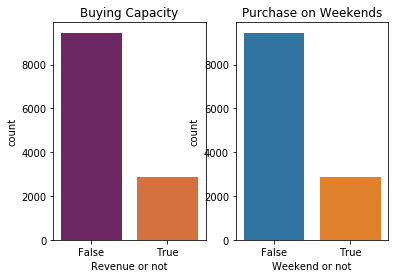

In [66]:
# checking the Distribution of customers on Revenue
plt.subplot(1, 2, 1)
sns.countplot(data['Weekend'], palette = 'inferno')
plt.title('Buying Capacity')
plt.xlabel('Revenue or not')
plt.ylabel('count')

# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(data['Weekend'])
plt.title('Purchase on Weekends')
plt.xlabel('Weekend or not')
plt.ylabel('count')

plt.show()

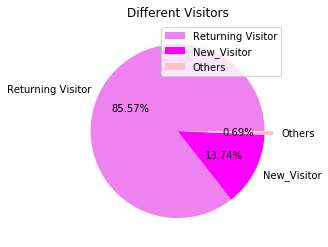

In [67]:
# browser distribution

size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.title('Different Visitors')
plt.legend()

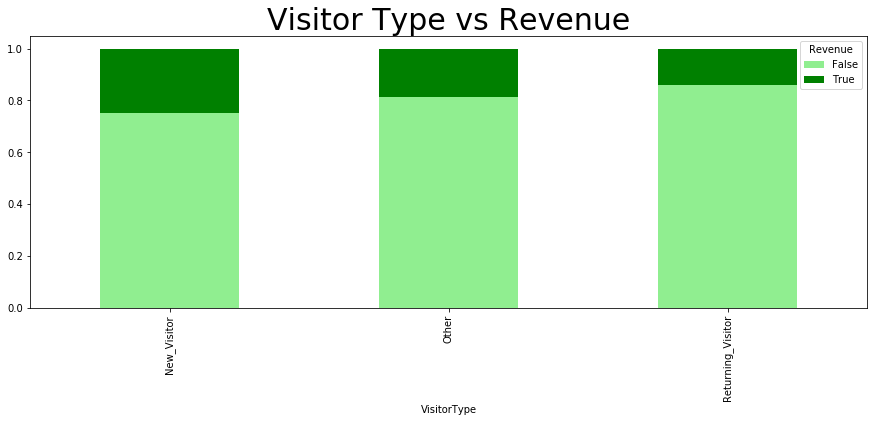

In [68]:
# visitor type vs revenue
df = pd.crosstab(data['VisitorType'], data['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

In [69]:
#Correlation Matrix
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1,0.6,0.38,0.26,0.43,0.37,-0.22,-0.32,0.099,-0.095,-0.0065,-0.025,-0.0057,-0.034,0.026,0.14
Administrative_Duration,0.6,1,0.3,0.24,0.29,0.36,-0.14,-0.21,0.067,-0.073,-0.0074,-0.016,-0.0057,-0.014,0.015,0.093
Informational,0.38,0.3,1,0.62,0.37,0.39,-0.12,-0.16,0.049,-0.048,-0.0094,-0.038,-0.029,-0.035,0.036,0.095
Informational_Duration,0.26,0.24,0.62,1,0.28,0.35,-0.074,-0.11,0.031,-0.031,-0.0096,-0.019,-0.027,-0.025,0.024,0.07
ProductRelated,0.43,0.29,0.37,0.28,1,0.86,-0.2,-0.29,0.056,-0.024,0.0042,-0.013,-0.038,-0.043,0.016,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1,-0.18,-0.25,0.053,-0.037,0.0029,-0.0075,-0.033,-0.037,0.0073,0.15
BounceRates,-0.22,-0.14,-0.12,-0.074,-0.2,-0.18,1,0.91,-0.12,0.073,0.024,-0.016,-0.0067,0.079,-0.047,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1,-0.17,0.1,0.015,-0.0044,-0.0088,0.079,-0.063,-0.21
PageValues,0.099,0.067,0.049,0.031,0.056,0.053,-0.12,-0.17,1,-0.064,0.018,0.046,0.011,0.012,0.012,0.49
SpecialDay,-0.095,-0.073,-0.048,-0.031,-0.024,-0.037,0.073,0.1,-0.064,1,0.013,0.0034,-0.016,0.052,-0.017,-0.082


In [11]:
data1 = pd.get_dummies(data)
data1.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [12]:
np.unique([data['Revenue']])

array([False,  True])

In [13]:
# label encoding of revenue
le = LabelEncoder()
data1['Revenue'] = le.fit_transform(data1['Revenue'])
data1['Revenue'].value_counts()

0    10408
1     1908
Name: Revenue, dtype: int64

In [14]:
np.unique([data1['Revenue']])

array([0, 1], dtype=int64)

In [15]:
feature_data = data1.drop(['Revenue'],axis = 1)
target_data = data1['Revenue']
# checking the shapes
print("Shape of Features:", feature_data.shape)
print("Shape of target:", target_data.shape)
feature_data = preprocessing.scale(feature_data)

Shape of Features: (12316, 28)
Shape of target: (12316,)


In [16]:
# splitting the data
x_train2, x_test2, y_train2, y_test2 = train_test_split(feature_data, target_data, test_size = 0.2, random_state = 0)

# checking the shapes

print("Shape of x_train :", x_train2.shape)
print("Shape of y_train :", y_train2.shape)
print("Shape of x_test :", x_test2.shape)
print("Shape of y_test :", y_test2.shape)


Shape of x_train : (9852, 28)
Shape of y_train : (9852,)
Shape of x_test : (2464, 28)
Shape of y_test : (2464,)


# Support Vector Classifier

In [59]:
svclassifier_dat = SVC(kernel='linear')
svclassifier_dat.fit(x_train2, y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
y_pred_dat = svclassifier_dat.predict(x_test2)

In [61]:
print("Accuracy of Linear SVM:",metrics.accuracy_score(y_test2, y_pred_dat))

Accuracy of Linear SVM: 0.8843344155844156


In [62]:
print(confusion_matrix(y_test2,y_pred_dat))
print(classification_report(y_test2,y_pred_dat))

[[2040   48]
 [ 237  139]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.93      2088
           1       0.74      0.37      0.49       376

    accuracy                           0.88      2464
   macro avg       0.82      0.67      0.71      2464
weighted avg       0.87      0.88      0.87      2464



In [35]:
for c in C:
    svclassifier_rbf_dat = SVC(kernel='rbf', C = c)
    svclassifier_rbf_dat.fit(x_train2, y_train2)
    y_pred_rbf_dat = svclassifier_rbf_dat.predict(x_test2)

    print("Accuracy SVM RBF kernel with C = ",c," is :",metrics.accuracy_score(y_test2, y_pred_rbf_dat))
    rbf_val.append(metrics.accuracy_score(y_test2, y_pred_rbf_dat))

Accuracy SVM RBF kernel with C =  0.1  is : 0.8474025974025974
Accuracy SVM RBF kernel with C =  1  is : 0.8498376623376623
Accuracy SVM RBF kernel with C =  10  is : 0.8794642857142857
Accuracy SVM RBF kernel with C =  100  is : 0.8887987012987013


In [37]:
print("Confusion Matrix for SVM RBF Kernel:")
print(confusion_matrix(y_test2,y_pred_rbf_dat))
print("Classification Report Matrix for SVM RBF Kernel:")
print(classification_report(y_test2,y_pred_rbf_dat))

Confusion Matrix for SVM RBF Kernel:
[[2047   41]
 [ 233  143]]
Classification Report Matrix for SVM RBF Kernel:
              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2088
        True       0.78      0.38      0.51       376

    accuracy                           0.89      2464
   macro avg       0.84      0.68      0.72      2464
weighted avg       0.88      0.89      0.87      2464



In [18]:
# SVM on online data - Polynomial Kernel
svclassifier_poly2 = SVC(kernel='poly', degree = 5)
svclassifier_poly2.fit(x_train2, y_train2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred_poly2 = svclassifier_poly2.predict(x_test2)

In [20]:
print("Accuracy SVM poly kernel:",metrics.accuracy_score(y_test2, y_pred_poly2))

Accuracy SVM poly kernel: 0.8745941558441559


In [21]:
print("Confusion Matrix for SVM Poly Kernel:")
print(confusion_matrix(y_test2,y_pred_poly2))
print("Classification Report Matrix for SVM Poly Kernel:")
print(classification_report(y_test2,y_pred_poly2))

Confusion Matrix for SVM Poly Kernel:
[[2049   39]
 [ 270  106]]
Classification Report Matrix for SVM Poly Kernel:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2088
           1       0.73      0.28      0.41       376

    accuracy                           0.87      2464
   macro avg       0.81      0.63      0.67      2464
weighted avg       0.86      0.87      0.85      2464



In [46]:
# SVM RBF kernal with gamma
param_test_svm = {
 'C':[0.1,1,10],
    'kernel':['rbf']
    
}
gsearch_svm = GridSearchCV(estimator = SVC(gamma=0.1), 
       param_grid = param_test_svm, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 2)
gsearch_svm.fit(x_train2,y_train2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   25.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid=False, n_jobs=4,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [47]:
print("Best Parameters :", gsearch_svm.best_params_)
print("Best Estimators :",gsearch_svm.best_estimator_)

Best Parameters : {'C': 0.1, 'kernel': 'rbf'}
Best Estimators : SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [48]:
param_test_svm = {
 'gamma':[1, 0.1, 0.01],
    'kernel':['rbf']
}
gsearch_svm = GridSearchCV(estimator = SVC(C=1), 
       param_grid = param_test_svm, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 2)
gsearch_svm.fit(x_train2, y_train2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   21.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=4,
             param_grid={'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [49]:
print("Best Parameters :", gsearch_svm.best_params_)
print("Best Estimators :",gsearch_svm.best_estimator_)

Best Parameters : {'gamma': 0.01, 'kernel': 'rbf'}
Best Estimators : SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [50]:
# RBF Fitting with best parameters
svm_rbf_fin = SVC( gamma = 0.01, C=1, kernel='rbf')
svm_rbf_fin.fit(x_train2, y_train2)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
# SVM RBF report 
y_pred_svm_rbf_fin = svm_rbf_fin.predict(x_test2)
print("RBF Accuracy report :")
print("Confusion Matrix :\n", confusion_matrix(y_test2,y_pred_svm_rbf_fin))
print("Classification Report :\n", classification_report(y_test2,y_pred_svm_rbf_fin))
print("Accuracy :", accuracy_score(y_test2, y_pred_svm_rbf_fin))

RBF Accuracy report :
Confusion Matrix :
 [[2034   54]
 [ 224  152]]
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2088
           1       0.74      0.40      0.52       376

    accuracy                           0.89      2464
   macro avg       0.82      0.69      0.73      2464
weighted avg       0.88      0.89      0.87      2464

Accuracy : 0.8871753246753247


In [52]:
# SVM Sigmoid Implementation
param_test_svm = {
 'C':[0.1,1,10],
    'kernel':['sigmoid']
}
gsearch_svm_sig = GridSearchCV(estimator = SVC(gamma=0.1), 
       param_grid = param_test_svm, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 2)
gsearch_svm_sig.fit(x_train2, y_train2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3, gamma=0.1,
                           kernel='rbf', max_iter=-1, probability=False,
                           random_state=None, shrinking=True, tol=0.001,
                           verbose=False),
             iid=False, n_jobs=4,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [53]:
print("Best C Parameters :", gsearch_svm_sig.best_params_)
print("Best Estimators :",gsearch_svm_sig.best_estimator_)

Best C Parameters : {'C': 0.1, 'kernel': 'sigmoid'}
Best Estimators : SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [54]:
param_test_svm = {
 'gamma':[1,0.1,0.01],
    'kernel':['sigmoid']
}
gsearch_svm_sig = GridSearchCV(estimator = SVC(C=1), 
       param_grid = param_test_svm, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 2)
gsearch_svm_sig.fit(x_train2,y_train2)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:    9.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid=False, n_jobs=4,
             param_grid={'gamma': [1, 0.1, 0.01], 'kernel': ['sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=2)

In [55]:
print("Best gamma Parameters :", gsearch_svm_sig.best_params_)
print("Best Estimators :",gsearch_svm_sig.best_estimator_)

Best gamma Parameters : {'gamma': 0.01, 'kernel': 'sigmoid'}
Best Estimators : SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [56]:
# SVM Sigmoid fitting with best parameters
svm_sig_fin = SVC(gamma = 0.01, C=1, kernel='sigmoid')
svm_sig_fin.fit(x_train2, y_train2)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
# SVM Sigmoid Report
y_pred_svm_sig_fin = svm_sig_fin.predict(x_test2)
print("SVM Sigmoid kernel Accuracy report :")
print("Confusion Matrix :\n", confusion_matrix(y_test2,y_pred_svm_sig_fin))
print("Classification Report :\n", classification_report(y_test2,y_pred_svm_sig_fin))
print("Accuracy :", accuracy_score(y_test2, y_pred_svm_sig_fin))

SVM Sigmoid kernel Accuracy report :
Confusion Matrix :
 [[2028   60]
 [ 221  155]]
Classification Report :
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      2088
           1       0.72      0.41      0.52       376

    accuracy                           0.89      2464
   macro avg       0.81      0.69      0.73      2464
weighted avg       0.87      0.89      0.87      2464

Accuracy : 0.8859577922077922


In [64]:
fpr1, tpr1, threshold1 = roc_curve(y_test2, y_pred_dat)
fpr2, tpr2, threshold2 = roc_curve(y_test2, y_pred_svm_rbf_fin)
fpr4, tpr4, threshold4 = roc_curve(y_test2, y_pred_svm_sig_fin)
print('roc_auc_score for SVM - Kernel - RBF: ',     roc_auc_score(y_test2, y_pred_svm_rbf_fin))
print('roc_auc_score for SVM - Kernel - Sigmoid: ', roc_auc_score(y_test2, y_pred_svm_sig_fin))
print('roc_auc_score for SVM - Kernel - Linear: ', roc_auc_score(y_test2, y_pred_dat))


roc_auc_score for SVM - Kernel - RBF:  0.6891966250917095
roc_auc_score for SVM - Kernel - Sigmoid:  0.6917492051846417
roc_auc_score for SVM - Kernel - Linear:  0.6733461726583517


In [22]:
fpr3, tpr3, threshold3 = roc_curve(y_test2, y_pred_poly2)
print('roc_auc_score for SVM - Kernel - Polynomial: ', roc_auc_score(y_test2, y_pred_poly2))

roc_auc_score for SVM - Kernel - Polynomial:  0.6316183663487406


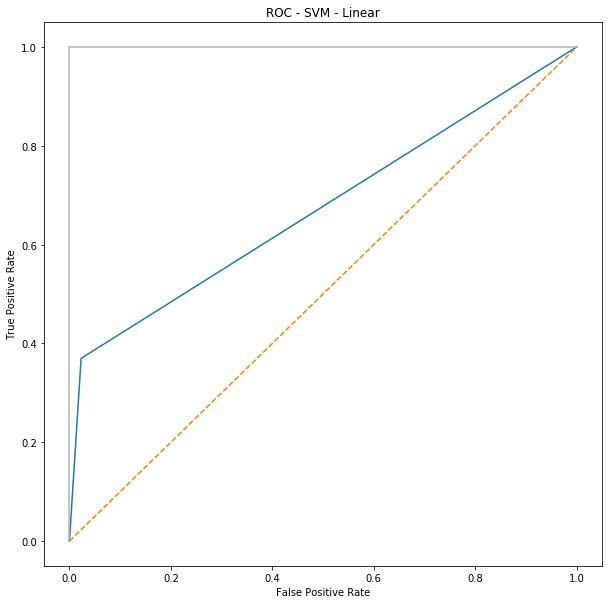

In [65]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC - SVM - Linear')
plt.plot(fpr1, tpr1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

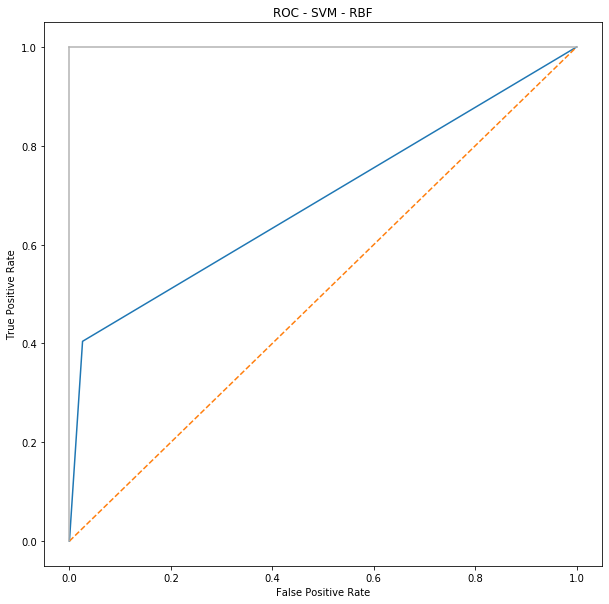

In [66]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC - SVM - RBF')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

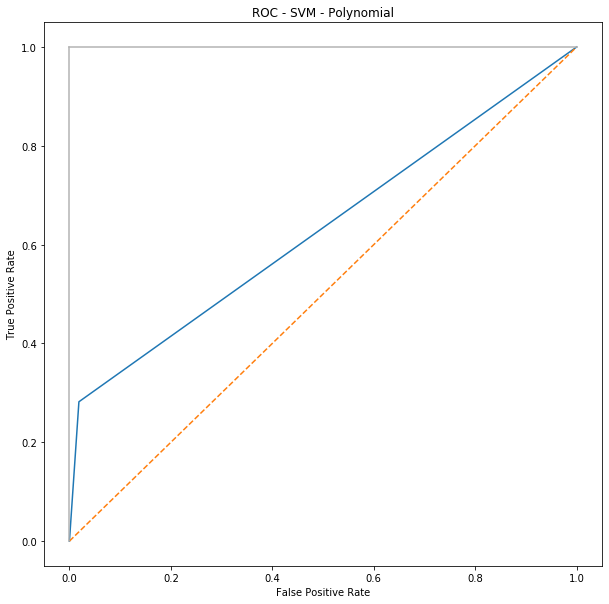

In [23]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC - SVM - Polynomial')
plt.plot(fpr3, tpr3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

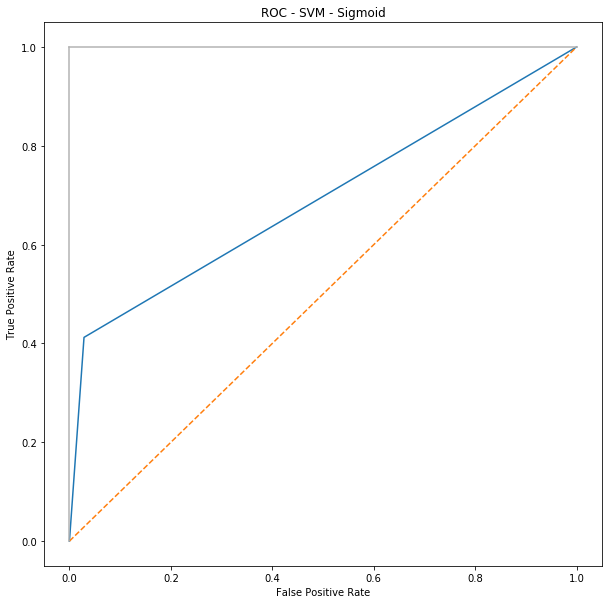

In [67]:
plt.subplots(1, figsize=(10,10))
plt.title('ROC - SVM - Sigmoid')
plt.plot(fpr4, tpr4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree

For Max_Depth: 3 CCP : 0.005 AUC score is : 0.6234256541941794 The Accuracy Score is : 0.8681006493506493
For Max_Depth: 5 CCP : 0.005 AUC score is : 0.7771663813483329 The Accuracy Score is : 0.8847402597402597
For Max_Depth: 10 CCP : 0.005 AUC score is : 0.7367734572430097 The Accuracy Score is : 0.8920454545454546
For Max_Depth: 15 CCP : 0.005 AUC score is : 0.7123889296486507 The Accuracy Score is : 0.8969155844155844
For Max_Depth: 3 CCP : 0.01 AUC score is : 0.5715588570962745 The Accuracy Score is : 0.8356331168831169
For Max_Depth: 5 CCP : 0.01 AUC score is : 0.7302315154479497 The Accuracy Score is : 0.8920454545454546
For Max_Depth: 10 CCP : 0.01 AUC score is : 0.5682165566153093 The Accuracy Score is : 0.8632305194805194
For Max_Depth: 15 CCP : 0.01 AUC score is : 0.6343747452514876 The Accuracy Score is : 0.8441558441558441


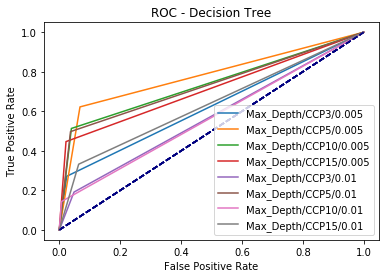

In [24]:
fpr = []
tpr = []
acc_dt2 = []
for alpha in alp:
    for dep in depth:
        dtree_dep = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_depth= dep, ccp_alpha = alpha)
        #need to include the random_state attribute to get consistent results.
        dtree_dep.fit(x_train2,y_train2)
        #predicting and plotting the tree
        y_pred_dt2 = dtree_dep.predict(x_test2)
        fpr, tpr, threshold = roc_curve(y_test2,  y_pred_dt2)
        accuracy = metrics.accuracy_score(y_test2, y_pred_dt2)
        acc_dt2.append(accuracy)
        auc= metrics.roc_auc_score(y_test2,  y_pred_dt2)
        print("For Max_Depth:" ,dep,"CCP :", alpha, "AUC score is :", auc,"The Accuracy Score is :" ,accuracy)

        plt.plot(fpr,tpr, label="Max_Depth/CCP" + str(dep) + '/' + str(alpha))

        #plt.plot([0, 1], ls="--")
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.legend(loc=4)
        plt.title('ROC - Decision Tree')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

Text(0.5, 1.0, 'Depth vs Accuracy for C = 0.005')

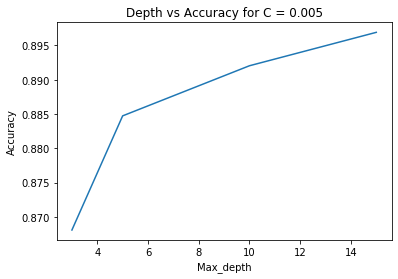

In [25]:
# Plotting depth vs Accuracy
plt.plot(depth,acc_dt2[:4])
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy for C = 0.005")

Text(0.5, 1.0, 'Depth vs Accuracy for C = 0.01')

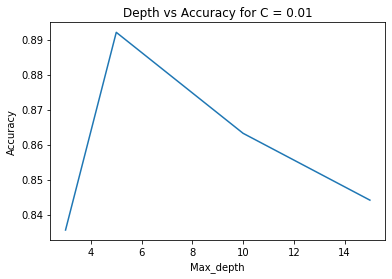

In [26]:
# Plotting depth vs Accuracy
plt.plot(depth,acc_dt2[4:8])
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy for C = 0.01")

# Boosting

In [27]:
param_test_dat2 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(3,8,1)
}
gsearch_dat2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test_dat2, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 2)
#need to include the random_state attribute to get consistent results.
gsearch_dat2.fit(feature_data,target_data)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   35.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
                                     seed=27, subsample=0.8, tree_meth

In [28]:
print(gsearch_dat2.best_params_)
print(gsearch_dat2.best_score_)

{'max_depth': 3, 'min_child_weight': 6}
0.9191933846763826


In [30]:
param_test_dat3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch_dat3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=7, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test_dat3, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 2)
#need to include the random_state attribute to get consistent results.
gsearch_dat3.fit(feature_data, target_data)
gsearch_dat3.best_params_, gsearch_dat3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   21.0s finished


({'gamma': 0.1}, 0.9191814346756126)

In [31]:
xgb_dat = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=7,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_dat.fit(feature_data, target_data)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [32]:
print(xgb_dat.score)

<bound method ClassifierMixin.score of XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)>


In [34]:
pred_xgb=xgb_dat.predict(x_test2)
accuracy_xgb = metrics.accuracy_score(y_test2, pred_xgb)
#y_pred_prob = xgb_dat.predict_proba(x_test2)[::,1]
print("Accuracy of Boosting data: ", accuracy_xgb)

Accuracy of Boosting data:  0.9541396103896104


Max_Depth: 3 Accuracy is: 0.8920454545454546 Auc : 0.7618509007907394
Max_Depth: 5 Accuracy is: 0.8952922077922078 Auc : 0.76703758050053
Max_Depth: 10 Accuracy is: 0.8948863636363636 Auc : 0.7569852042064075
Max_Depth: 15 Accuracy is: 0.895698051948052 Auc : 0.7629157495720225


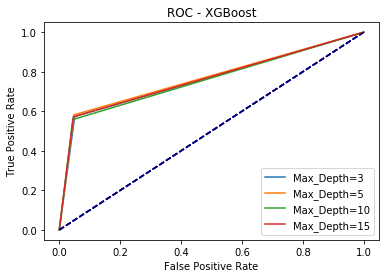

In [37]:
accuracy_xgb3=[]
for dep in depth:
    bst = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=dep, min_child_weight=7,
             gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005, objective= 'binary:logistic',
                 nthread=4, scale_pos_weight=1, seed=27)
    #need to include the random_state attribute to get consistent results.

    bst.fit(x_train2, y_train2)
    pred_xgb1=bst.predict(x_test2)

    accuracy_xgb3.append(metrics.accuracy_score(y_test2, pred_xgb1))
    #y_prob = bst.predict_proba(x_test2)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test2,  pred_xgb1)
    auc = metrics.roc_auc_score(y_test2,  pred_xgb1)
    plt.plot(fpr,tpr, label="Max_Depth=" +str(dep))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC - XGBoost")
    print("Max_Depth:" , dep, "Accuracy is:", metrics.accuracy_score(y_test2, pred_xgb1), "Auc :", auc)


# Cross Validation

In [68]:
# Cross Validation for Decision Tree
print("Cross Validation for Decision Tree")
accuracy_cv_dt=[]
for dep in depth:
    dtclss = DecisionTreeClassifier(criterion = "gini", splitter='random',max_depth=dep,max_leaf_nodes=10)
    #need to include the random_state attribute to get consistent results
    cv_dt=cross_val_score(dtclss,feature_data,target_data,cv =5)
    accuracy_cv_dt.append(np.mean(cv_dt))
    print("Max_Depth:" ,dep, "Mean Accuracy Score: " ,np.mean(cv_dt))

Cross Validation for Decision Tree
Max_Depth: 3 Mean Accuracy Score:  0.8583154715767384
Max_Depth: 5 Mean Accuracy Score:  0.8833199864487927
Max_Depth: 10 Mean Accuracy Score:  0.8787729500503556
Max_Depth: 15 Mean Accuracy Score:  0.8638322497640403


Text(0.5, 1.0, 'Depth vs Accuracy CV Decision Trees')

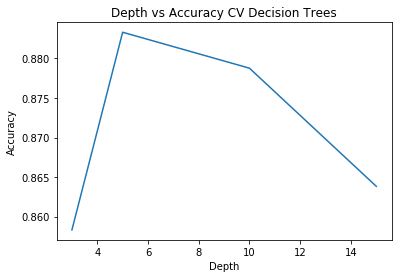

In [69]:
plt.plot(depth,accuracy_cv_dt)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy CV Decision Trees")

In [40]:
# Cross Validation for XGBoost
accuracy_cv_xgb2=[]
for dep in depth:
    bst_cv2=XGBClassifier(n_estimators=500,max_depth=dep)
    cv_dt2=cross_val_score(bst_cv2,feature_data,target_data,cv =5)
    #need to include the random_state attribute to get consistent results
    accuracy_cv_xgb2.append(np.mean(cv_dt2))
    print("Depth:", dep, "CV Mean Accuracy :", np.mean(cv_dt2))#, "AUC :", metrics.roc_auc_score(y_test2,  y_pred_prob))
    cv_dt2


Depth: 3 CV Mean Accuracy : 0.884618687747494
Depth: 5 CV Mean Accuracy : 0.8867300989712683
Depth: 10 CV Mean Accuracy : 0.8862424598341164
Depth: 15 CV Mean Accuracy : 0.8881102327433021


Text(0.5, 1.0, 'Depth vs Accuracy CV XGBoost')

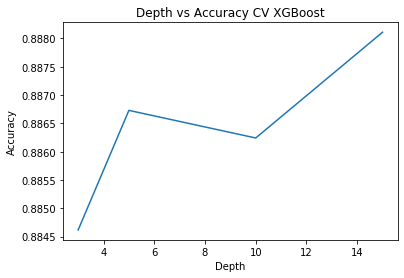

In [41]:
plt.plot(depth,accuracy_cv_xgb2)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy CV XGBoost")

In [44]:
svm_lin2 = svm.SVC(kernel = 'linear')
acc_lin2 = cross_val_score(svm_lin2, feature_data, target_data, cv=5).mean()
print('The accuracy for SVM Linear after Cross Validation',acc_lin2)

The accuracy for SVM Linear after Cross Validation 0.8834838070983017


In [45]:
svm_rbf2 = svm.SVC(kernel = 'rbf', C = 1)
acc_rbf2 = cross_val_score(svm_rbf2, feature_data, target_data,cv=5).mean()
print('The accuracy for SVM rbf after Cross Validation',acc_rbf2)

The accuracy for SVM rbf after Cross Validation 0.8876245709223787


In [43]:
svm_poly2 = svm.SVC(kernel = 'poly', degree = 5, C = 1)
acc_poly2 = cross_val_score(svm_poly2, feature_data, target_data, cv=5).mean()
print('The accuracy for SVM Polynomial after Cross Validation',acc_poly2)

The accuracy for SVM Polynomial after Cross Validation 0.8628610249880042


In [42]:
svm_sig2 = svm.SVC(kernel = 'sigmoid', degree = 5, C = 1)
acc_sig2 = cross_val_score(svm_sig2, feature_data, target_data, cv=5).mean()
print('The accuracy for SVM Polynomial after Cross Validation',acc_sig2)

The accuracy for SVM Polynomial after Cross Validation 0.839554167918967


# Neural Network

In [45]:
def plot_for_epoch2(acc,val_acc,param,model):
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('{} model for {}'.format(model, param))
    plt.ylabel('{}'.format(model))
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [46]:
def ann_single_activation2(param, nodes):
    # split with 10% of validation data to prepare during model fit
    train, val_train, test, val_test = train_test_split(x_train2, y_train2, test_size = 0.1, random_state = 0)

    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(nodes[0], input_dim=train.shape[1], activation=param))
    for i in range(len(nodes)-2):
        model.add(Dense(nodes[i+1], activation=param))
    model.add(Dense(nodes[-1], activation='sigmoid'))

    print('Model Summary is \n')
    print(model.summary())
    
    # optimizer Gradient Descent
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    print("Fitting for ANN model with {} layers and {} activation".format(len(nodes),param))
    history = model.fit(train, test, epochs=50, batch_size=64, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor], shuffle = False)
    
    # evaluate the training set
    _, tr_acc = model.evaluate(train, test)
    print('\n')
    print('Training Accuracy: %.2f' % (tr_acc*100))
    print('\n')
    y_pred = model.predict_classes(x_test2)
    te_acc = accuracy_score(y_pred,y_test2)
    print('Test Accuracy: %.2f' % (te_acc*100))
    print('\n')
    cm = confusion_matrix(y_test2,y_pred)
    print(cm)
    print(classification_report(y_test2,y_pred)) 
    print("AUC",roc_auc_score(y_test2,y_pred))
    
    plot_for_epoch2(history.history['accuracy'], history.history['val_accuracy'], param, 'accuracy')
    plot_for_epoch2(history.history['loss'], history.history['val_loss'], param, 'loss')
    
    return (cm, tr_acc, te_acc,history.history)

In [52]:
def ann_batch_normalization2(param, nodes):
    # split with 10% of validation data to prepare during model fit
    train, val_train, test, val_test = train_test_split(x_train2, y_train2, test_size = 0.1, random_state = 0)

    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(nodes[0], input_dim=train.shape[1], activation=param))
    for i in range(len(nodes)-2):
        model.add(BatchNormalization())
        model.add(Dense(nodes[i+1], activation=param))
    model.add(BatchNormalization())
    model.add(Dense(nodes[-1], activation='sigmoid'))

    print('Model Summary is \n')
    print(model.summary())
    
    # optimizer Gradient Descent
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    print("Fitting for ANN model using batch normalization with {} layers and {} activation".format(len(nodes),param))
    history = model.fit(train, test, epochs=70, batch_size=128, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor], shuffle = False)
    
    # evaluate the training set
    _, tr_acc = model.evaluate(train, test)
    print('\n')
    print('Training Accuracy: %.2f' % (tr_acc*100))
    print('\n')
    y_pred = model.predict_classes(x_test2)
    te_acc = accuracy_score(y_pred,y_test2)
    print('Test Accuracy: %.2f' % (te_acc*100))
    print('\n')
    cm = confusion_matrix(y_test2,y_pred)
    print(cm)
    print(classification_report(y_test2,y_pred)) 
    print("AUC",roc_auc_score(y_test2,y_pred))
    
    plot_for_epoch2(history.history['accuracy'], history.history['val_accuracy'], param, 'accuracy')
    plot_for_epoch2(history.history['loss'], history.history['val_loss'], param, 'loss')
    
    return (cm, tr_acc, te_acc,history.history)

In [53]:
def ann_dropout2(param, nodes):
    # split with 10% of validation data to prepare during model fit
    train, val_train, test, val_test = train_test_split(x_train2, y_train2, test_size = 0.1, random_state = 0)

    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(nodes[0], input_dim=train.shape[1], activation=param))
    for i in range(len(nodes)-2):
        model.add(Dropout(0.25))
        model.add(Dense(nodes[i+1], activation=param))
    model.add(Dropout(0.25))
    model.add(Dense(nodes[-1], activation='sigmoid'))

    print('Model Summary is \n')
    print(model.summary())
    
    # optimizer Gradient Descent
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    print("Fitting for ANN model using dropout with {} layers and {} activation".format(len(nodes),param))
    history = model.fit(train, test, epochs=70, batch_size=128, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor], shuffle = False)
    
    # evaluate the training set
    _, tr_acc = model.evaluate(train, test)
    print('\n')
    print('Training Accuracy: %.2f' % (tr_acc*100))
    print('\n')
    y_pred = model.predict_classes(x_test2)
    te_acc = accuracy_score(y_pred,y_test2)
    print('Test Accuracy: %.2f' % (te_acc*100))
    print('\n')
    cm = confusion_matrix(y_test2,y_pred)
    print(cm)
    print(classification_report(y_test2,y_pred)) 
    print("AUC",roc_auc_score(y_test2,y_pred))
    
    plot_for_epoch2(history.history['accuracy'], history.history['val_accuracy'], param, 'accuracy')
    plot_for_epoch2(history.history['loss'], history.history['val_loss'], param, 'loss')
    
    return (cm, tr_acc, te_acc,history.history)

In [63]:
def ann_adam_optimizer2(param, nodes):
    # split with 10% of validation data to prepare during model fit
    train, val_train, test, val_test = train_test_split(x_train2, y_train2, test_size = 0.1, random_state = 0)

    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(nodes[0], input_dim=train.shape[1], activation=param))
    for i in range(len(nodes)-2):
        model.add(Dense(nodes[i+1], activation=param))
    model.add(Dense(nodes[-1], activation='sigmoid'))

    print('Model Summary is \n')
    print(model.summary())
    
    # optimizer Gradient Descent
    adam = optimizers.adam(lr = 0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    print("Fitting for ANN model using Adam Optimizer with {} layers and {} activation".format(len(nodes),param))
    history = model.fit(train, test, epochs=70, batch_size=128, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor], shuffle = False)
    
    # evaluate the training set
    _, tr_acc = model.evaluate(train, test)
    print('\n')
    print('Training Accuracy: %.2f' % (tr_acc*100))
    print('\n')
    y_pred = model.predict_classes(x_test2)
    te_acc = accuracy_score(y_pred,y_test2)
    print('Test Accuracy: %.2f' % (te_acc*100))
    print('\n')
    cm = confusion_matrix(y_test2,y_pred)
    print(cm)
    print(classification_report(y_test2,y_pred)) 
    print("AUC",roc_auc_score(y_test2,y_pred))
    
    plot_for_epoch2(history.history['accuracy'], history.history['val_accuracy'], param, 'accuracy')
    plot_for_epoch2(history.history['loss'], history.history['val_loss'], param, 'loss')
    
    return (cm, tr_acc, te_acc,history.history)

In [50]:
def model_act2(act_param, comb):
    tr_ac_sig = list()
    te_ac_sig = list()
    cm_sig = list()
    #comb = [[30,30,1],[35,35,35,1],[40,40,40,1]]
    #comb = [[50,50,50,1],[35,35,35,1],[30,30,30,30,30,1]]

    for i in comb:
        cm,tr_ac,te_ac,_ = ann_single_activation2(act_param,i)
        cm_sig.append(cm)
        tr_ac_sig.append(tr_ac)
        te_ac_sig.append(te_ac)
    final_tr1 = np.mean(tr_ac_sig)
    final_te1 = np.mean(te_ac_sig)
    YY1 = tr_ac_sig
    YY2 = te_ac_sig
    ax = plt.subplot()
    t1 = ['1','2','3']
    plt.plot(t1, YY1,color='blue', linewidth=2, markersize=5, marker='o')
    plt.plot(t1,YY2,color='green', linewidth=2, markersize=5, marker='o')
    ax.plot(t1, YY1, label='training accuracy')
    ax.plot(t1, YY2, label='test accuracy')
    plt.xlabel('Layer Combinations')
    plt.ylabel('Accuracy')
    plt.title('{} ANN Performance'.format(act_param))
    print("Combination 1 : ",comb[0])
    print("Combination 2 : ",comb[1])
    print("Combination 3 : ",comb[2])
    ax.legend()

Model Summary is 

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 31        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 48us/step - loss: 0.5727 - accuracy: 0.7184 - val_loss: 0.4285 - val_accuracy: 0.8529
Epoch 2/50
8866/8866 [==============================] - 0s 25us/step - loss: 0.3841 - accuracy: 0.8662 - val_loss: 0.3468 - val_accuracy: 0.8753
Epoch 3/50
8866/8866 [==============================] - 0s 27us/step - loss: 0.3302 - accuracy: 0.87

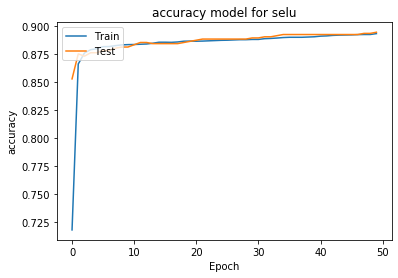

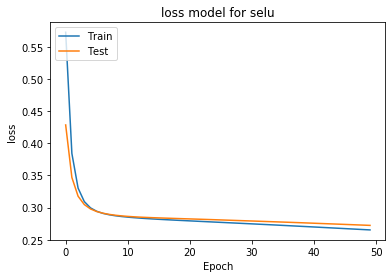

Model Summary is 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 41        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 51us/step - loss: 0.6185 - accuracy: 0.6852 - val_loss: 0.4269 - val_accuracy: 0.8337
Epoch 2/50
8866/8866 [==============================] - 0s 30us/step - loss: 0.3611 - accuracy: 0.8679 - val_loss: 0.3406 - val_accuracy: 0.8661
Epoch 3/50
8866/8866 [==============================] - 0s 30us/step - loss: 0.3139 - accuracy: 


AUC 0.70092524659656


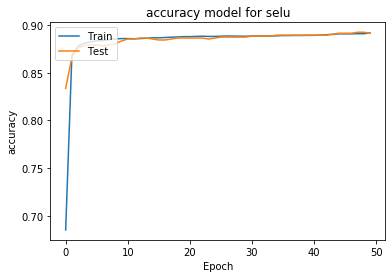

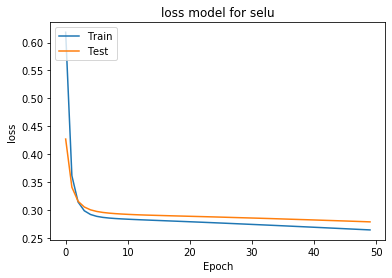

Model Summary is 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 51        
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 50us/step - loss: 0.5879 - accuracy: 0.7155 - val_loss: 0.4575 - val_accuracy: 0.8134
Epoch 2/50
8866/8866 [==============================] - 0s 33us/step - loss: 0.3909 - accuracy: 0.8551 - val_loss: 0.3595 - val_accuracy: 0.8702
Epoch 3/50
8866/8866 [==============================] - 0s 29us/step - loss: 0.3320 - accuracy: 

 [ 217  159]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      2088
           1       0.73      0.42      0.54       376

    accuracy                           0.89      2464
   macro avg       0.82      0.70      0.74      2464
weighted avg       0.88      0.89      0.88      2464

AUC 0.6975472813238771


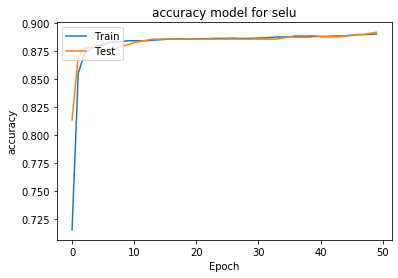

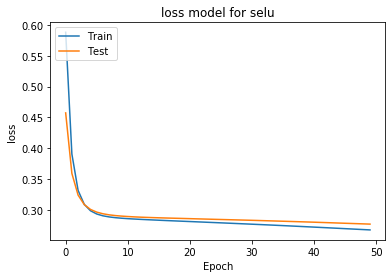

Combination 1 :  [30, 1]
Combination 2 :  [40, 1]
Combination 3 :  [50, 1]


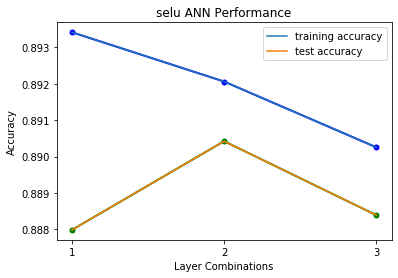

In [30]:
#selu Activation with 1 layer combination
comb = [[30,1],[40,1],[50,1]]
model_act2('selu', comb)

Model Summary is 

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_50 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 31        
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 54us/step - loss: 0.5236 - accuracy: 0.7640 - val_loss: 0.3907 - val_accuracy: 0.8408
Epoch 2/50
8866/8866 [==============================] - 0s 32us/step - loss: 0.3379 - accuracy: 0.8677 - val_

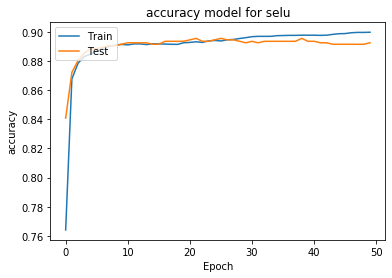

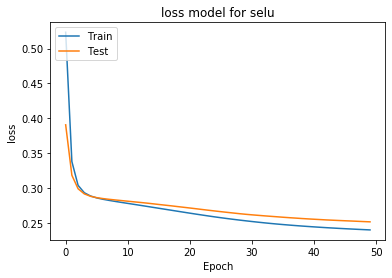

Model Summary is 

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_53 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 41        
Total params: 2,841
Trainable params: 2,841
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 1s 60us/step - loss: 0.4731 - accuracy: 0.7872 - val_loss: 0.3642 - val_accuracy: 0.8651
Epoch 2/50
8866/8866 [==============================] - 0s 37us/step - loss: 0.3246 - accuracy: 0.8744 - val_

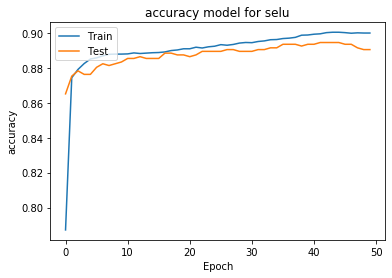

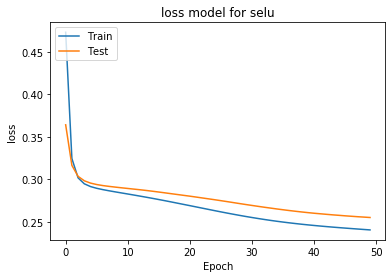

Model Summary is 

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_56 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 51        
Total params: 4,051
Trainable params: 4,051
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 1s 61us/step - loss: 0.4318 - accuracy: 0.8159 - val_loss: 0.3225 - val_accuracy: 0.8753
Epoch 2/50
8866/8866 [==============================] - 0s 39us/step - loss: 0.3042 - accuracy: 0.8807 - val_

8866/8866 [==============================] - 0s 32us/step


Training Accuracy: 90.00


Test Accuracy: 89.29


[[2011   77]
 [ 187  189]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2088
           1       0.71      0.50      0.59       376

    accuracy                           0.89      2464
   macro avg       0.81      0.73      0.76      2464
weighted avg       0.88      0.89      0.89      2464

AUC 0.7328910899160348


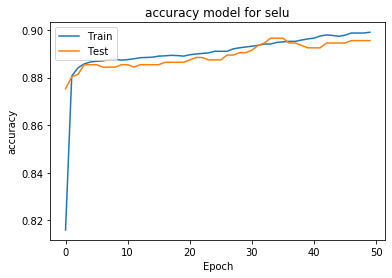

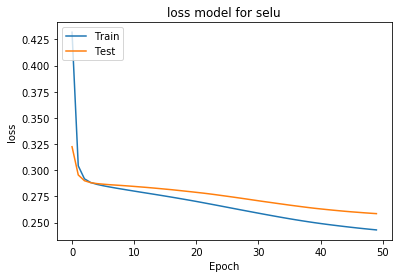

Combination 1 :  [30, 30, 1]
Combination 2 :  [40, 40, 1]
Combination 3 :  [50, 50, 1]


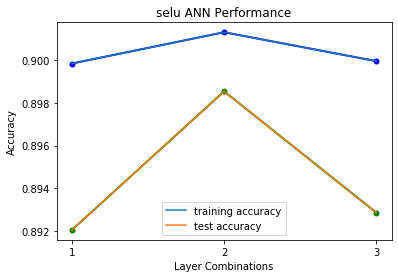

In [33]:
#selu Activation with 2 layer combination
comb = [[30,30,1],[40,40,1],[50,50,1]]
model_act2('selu', comb)

Model Summary is 

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_98 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_99 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 31        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 1s 59us/step - loss: 0.4556 - accuracy: 0.8039 - val_loss: 0.3395 

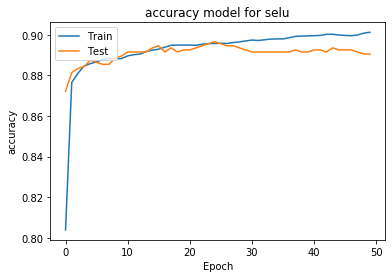

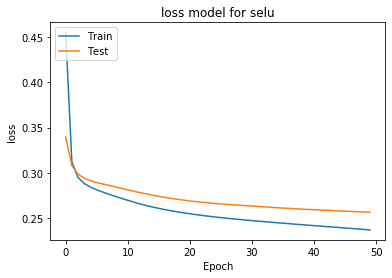

Model Summary is 

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 40)                1160      
_________________________________________________________________
dense_102 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_103 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 41        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 1s 71us/step - loss: 0.4434 - accuracy: 0.8066 - val_loss: 0.3250 

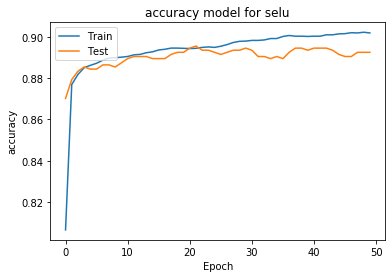

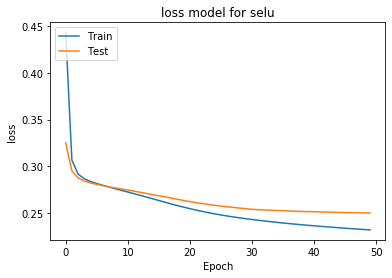

Model Summary is 

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 50)                1450      
_________________________________________________________________
dense_106 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_107 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 51        
Total params: 6,601
Trainable params: 6,601
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 1s 73us/step - loss: 0.4560 - accuracy: 0.7962 - val_loss: 0.3349 

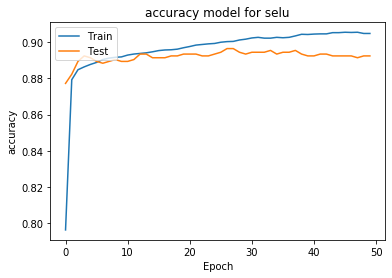

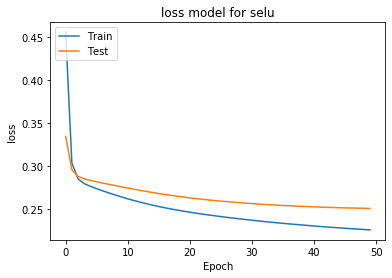

Combination 1 :  [30, 30, 30, 1]
Combination 2 :  [40, 40, 40, 1]
Combination 3 :  [50, 50, 50, 1]


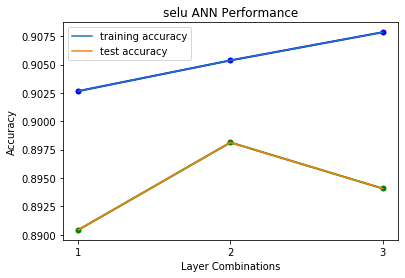

In [38]:
#selu Activation with 3 layer combination
comb = [[30,30,30,1],[40,40,40,1],[50,50,50,1]]
model_act2('selu', comb)

Model Summary is 

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 31        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 43us/step - loss: 0.6095 - accuracy: 0.6891 - val_loss: 0.5109 - val_accuracy: 0.7748
Epoch 2/50
8866/8866 [==============================] - 0s 24us/step - loss: 0.4530 - accuracy: 0.8234 - val_loss: 0.4190 - val_accuracy: 0.8377
Epoch 3/50
8866/8866 [==============================] - 0s 24us/step - loss: 0.3852 - accuracy: 0.85


AUC 0.71169601369528


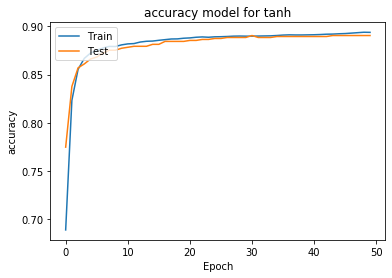

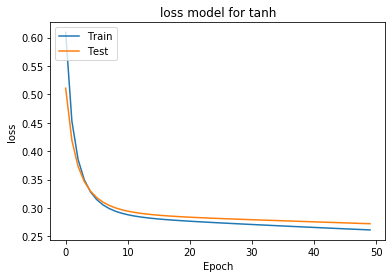

Model Summary is 

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 41        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 43us/step - loss: 0.6871 - accuracy: 0.6174 - val_loss: 0.5373 - val_accuracy: 0.7799
Epoch 2/50
8866/8866 [==============================] - 0s 28us/step - loss: 0.4657 - accuracy: 0.8323 - val_loss: 0.4253 - val_accuracy: 0.8306
Epoch 3/50
8866/8866 [==============================] - 0s 26us/step - loss: 0.3907 - accuracy: 

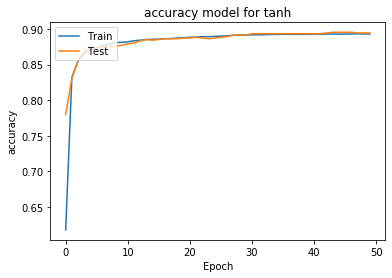

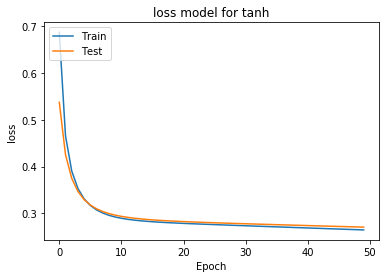

Model Summary is 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 51        
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 43us/step - loss: 0.5632 - accuracy: 0.7467 - val_loss: 0.4639 - val_accuracy: 0.8103
Epoch 2/50
8866/8866 [==============================] - 0s 29us/step - loss: 0.4146 - accuracy: 0.8390 - val_loss: 0.3809 - val_accuracy: 0.8611
Epoch 3/50
8866/8866 [==============================] - 0s 29us/step - loss: 0.3557 - accuracy: 

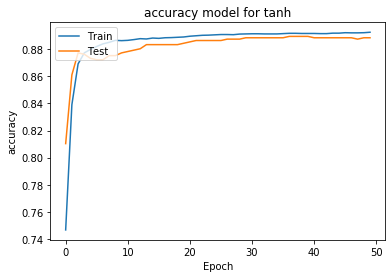

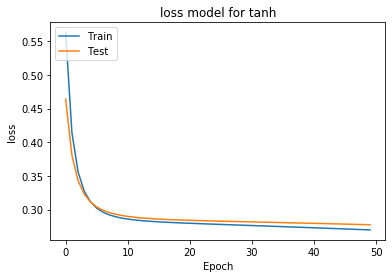

Combination 1 :  [30, 1]
Combination 2 :  [40, 1]
Combination 3 :  [50, 1]


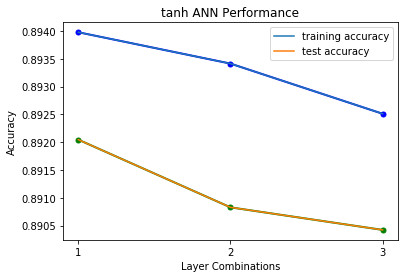

In [31]:
#tanh Activation with 1 layer combination
comb = [[30,1],[40,1],[50,1]]
model_act2('tanh', comb)

Model Summary is 

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_41 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 31        
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 48us/step - loss: 0.5309 - accuracy: 0.7638 - val_loss: 0.4333 - val_accuracy: 0.8519
Epoch 2/50
8866/8866 [==============================] - 0s 28us/step - loss: 0.3921 - accuracy: 0.8550 - val_

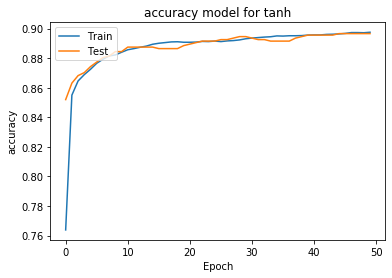

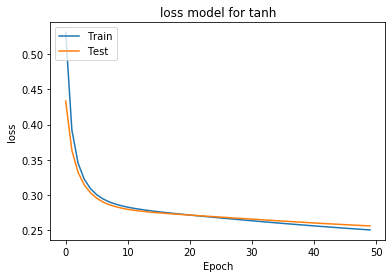

Model Summary is 

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_44 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 41        
Total params: 2,841
Trainable params: 2,841
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 44us/step - loss: 0.5449 - accuracy: 0.7437 - val_loss: 0.4427 - val_accuracy: 0.8306
Epoch 2/50
8866/8866 [==============================] - 0s 29us/step - loss: 0.3888 - accuracy: 0.8564 - val_

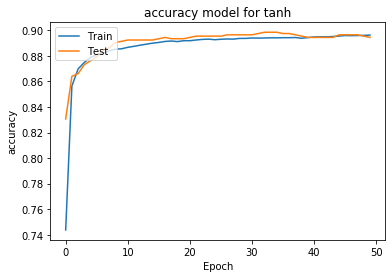

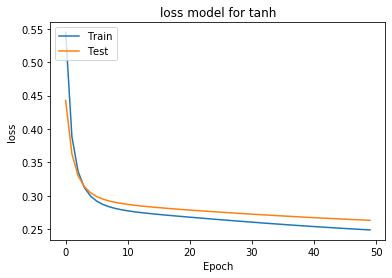

Model Summary is 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_47 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 51        
Total params: 4,051
Trainable params: 4,051
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 54us/step - loss: 0.5322 - accuracy: 0.7555 - val_loss: 0.4288 - val_accuracy: 0.8540
Epoch 2/50
8866/8866 [==============================] - 0s 31us/step - loss: 0.3798 - accuracy: 0.8676 - val_

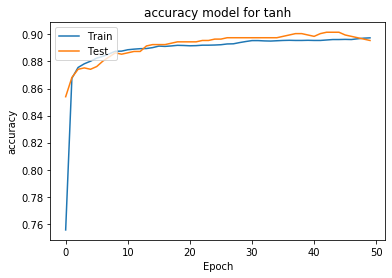

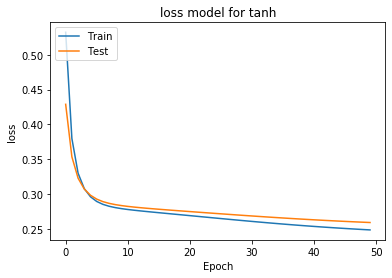

Combination 1 :  [30, 30, 1]
Combination 2 :  [40, 40, 1]
Combination 3 :  [50, 50, 1]


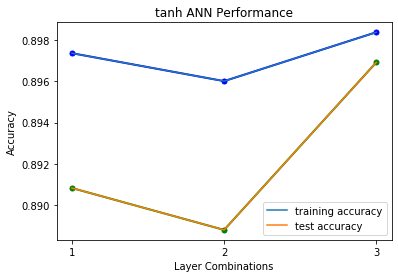

In [32]:
#tanh Activation with 2 layer combination
comb = [[30,30,1],[40,40,1],[50,50,1]]
model_act2('tanh', comb)

Model Summary is 

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_86 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_87 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 31        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 49us/step - loss: 0.4960 - accuracy: 0.7892 - val_loss: 0.3937 

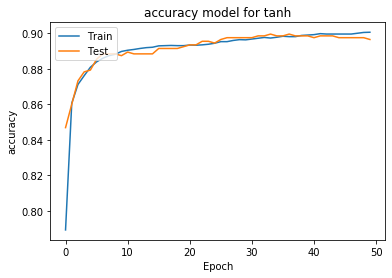

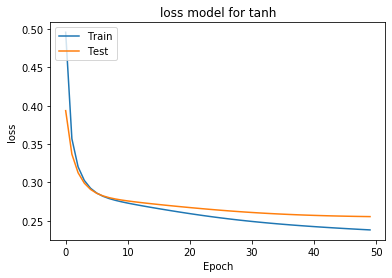

Model Summary is 

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_90 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_91 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 41        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 48us/step - loss: 0.5212 - accuracy: 0.7705 - val_loss: 0.4362 

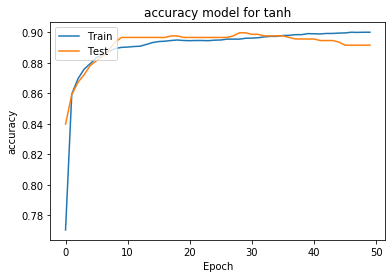

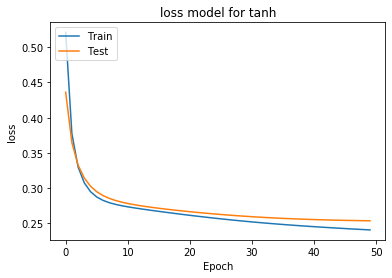

Model Summary is 

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_94 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_95 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 51        
Total params: 6,601
Trainable params: 6,601
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and tanh activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 54us/step - loss: 0.5381 - accuracy: 0.7557 - val_loss: 0.4179 

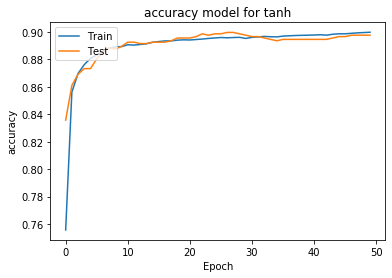

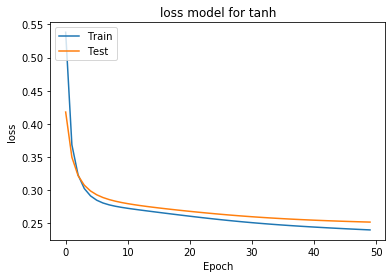

Combination 1 :  [30, 30, 30, 1]
Combination 2 :  [40, 40, 40, 1]
Combination 3 :  [50, 50, 50, 1]


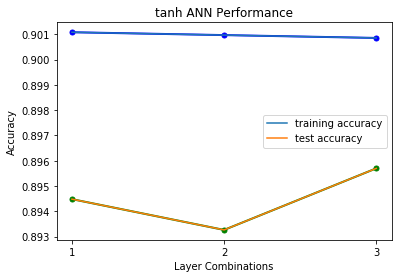

In [37]:
#tanh Activation with 3 layer combination
comb = [[30,30,30,1],[40,40,40,1],[50,50,50,1]]
model_act2('tanh', comb)

Model Summary is 

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 31        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 40us/step - loss: 0.5834 - accuracy: 0.7202 - val_loss: 0.4373 - val_accuracy: 0.8256
Epoch 2/50
8866/8866 [==============================] - 0s 27us/step - loss: 0.3935 - accuracy: 0.8481 - val_loss: 0.3879 - val_accuracy: 0.8458
Epoch 3/50
8866/8866 [==============================] - 0s 24us/step - loss: 0.3593 - accuracy: 0.85

AUC 0.7012971794244722


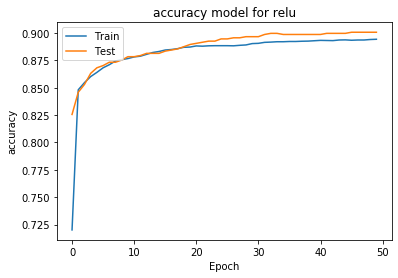

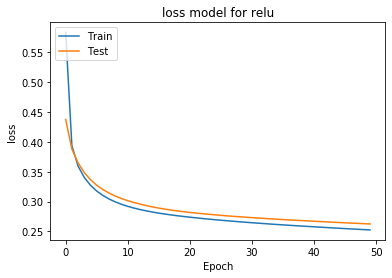

Model Summary is 

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 41        
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 43us/step - loss: 0.5626 - accuracy: 0.7602 - val_loss: 0.4592 - val_accuracy: 0.8306
Epoch 2/50
8866/8866 [==============================] - 0s 26us/step - loss: 0.4191 - accuracy: 0.8447 - val_loss: 0.3981 - val_accuracy: 0.8377
Epoch 3/50
8866/8866 [==============================] - 0s 27us/step - loss: 0.3779 - accuracy: 

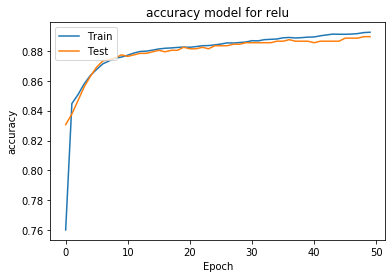

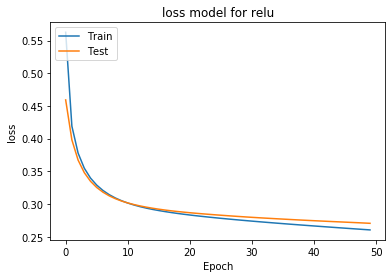

Model Summary is 

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 51        
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 44us/step - loss: 0.4939 - accuracy: 0.7901 - val_loss: 0.4095 - val_accuracy: 0.8489
Epoch 2/50
8866/8866 [==============================] - 0s 27us/step - loss: 0.3771 - accuracy: 0.8551 - val_loss: 0.3688 - val_accuracy: 0.8519
Epoch 3/50
8866/8866 [==============================] - 0s 20us/step - loss: 0.3462 - accuracy: 

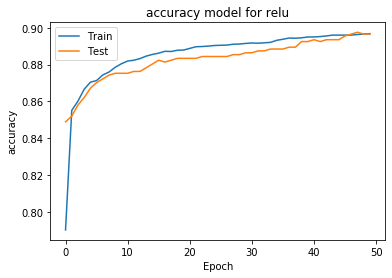

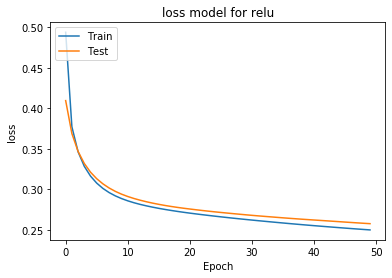

Combination 1 :  [30, 1]
Combination 2 :  [40, 1]
Combination 3 :  [50, 1]


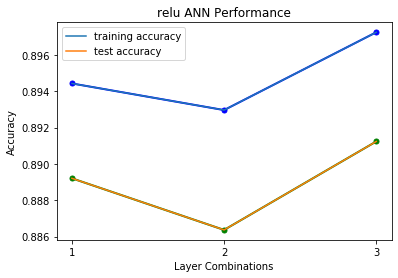

In [34]:
#Relu Activation with 1 layer combination
comb = [[30,1],[40,1],[50,1]]
model_act2('relu', comb)

Model Summary is 

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_65 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 31        
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 48us/step - loss: 0.5496 - accuracy: 0.7560 - val_loss: 0.4553 - val_accuracy: 0.8347
Epoch 2/50
8866/8866 [==============================] - 0s 30us/step - loss: 0.4152 - accuracy: 0.8456 - val_

8866/8866 [==============================] - 0s 26us/step


Training Accuracy: 89.94


Test Accuracy: 89.41


[[2006   82]
 [ 179  197]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2088
           1       0.71      0.52      0.60       376

    accuracy                           0.89      2464
   macro avg       0.81      0.74      0.77      2464
weighted avg       0.89      0.89      0.89      2464

AUC 0.7423320697807125


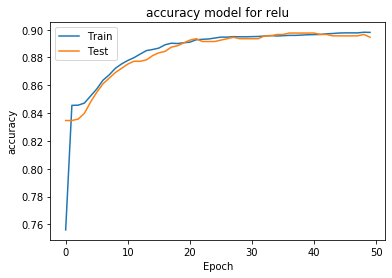

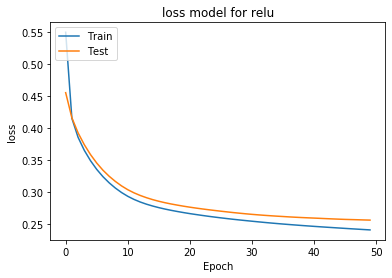

Model Summary is 

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_68 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 41        
Total params: 2,841
Trainable params: 2,841
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 48us/step - loss: 0.5062 - accuracy: 0.8234 - val_loss: 0.4413 - val_accuracy: 0.8347
Epoch 2/50
8866/8866 [==============================] - 0s 31us/step - loss: 0.4143 - accuracy: 0.8460 - val_

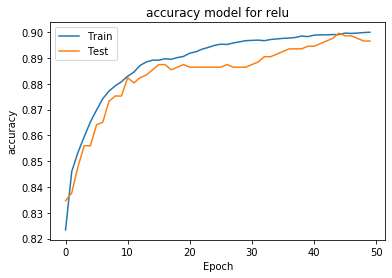

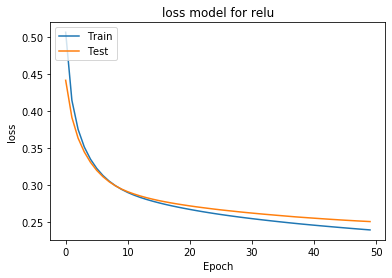

Model Summary is 

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_71 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 51        
Total params: 4,051
Trainable params: 4,051
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 46us/step - loss: 0.4791 - accuracy: 0.8209 - val_loss: 0.4303 - val_accuracy: 0.8347
Epoch 2/50
8866/8866 [==============================] - 0s 30us/step - loss: 0.3879 - accuracy: 0.8480 - val_

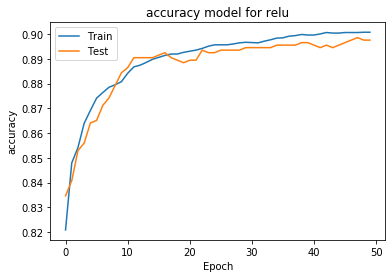

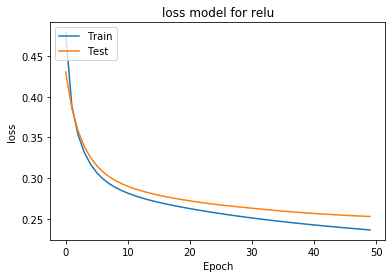

Combination 1 :  [30, 30, 1]
Combination 2 :  [40, 40, 1]
Combination 3 :  [50, 50, 1]


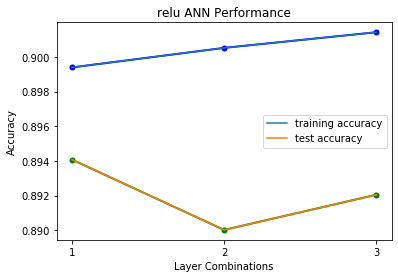

In [35]:
#Relu Activation with 2 layer combination
comb = [[30,30,1],[40,40,1],[50,50,1]]
model_act2('relu', comb)

Model Summary is 

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 30)                870       
_________________________________________________________________
dense_74 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_75 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 31        
Total params: 2,761
Trainable params: 2,761
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 46us/step - loss: 0.4877 - accuracy: 0.8386 - val_loss: 0.4439 

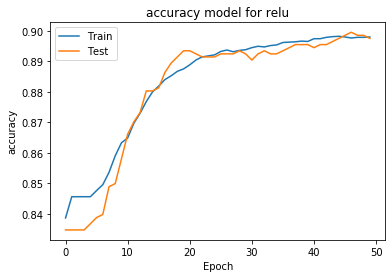

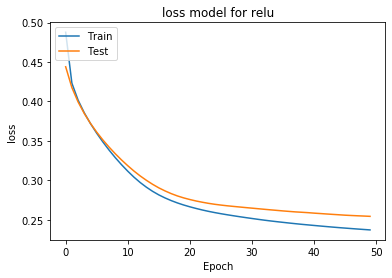

Model Summary is 

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_78 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_79 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 41        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 53us/step - loss: 0.5701 - accuracy: 0.7524 - val_loss: 0.4761 

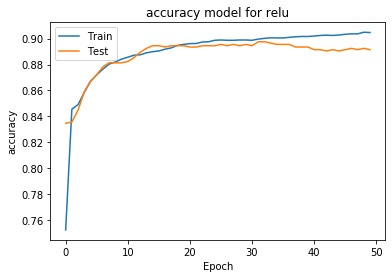

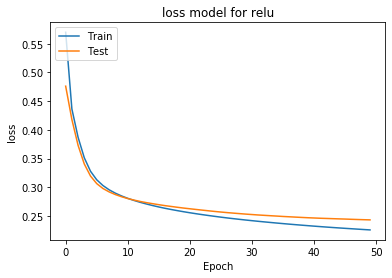

Model Summary is 

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 50)                1450      
_________________________________________________________________
dense_82 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_83 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 51        
Total params: 6,601
Trainable params: 6,601
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and relu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/50
8866/8866 [==============================] - 0s 52us/step - loss: 0.4835 - accuracy: 0.8386 - val_loss: 0.4322 

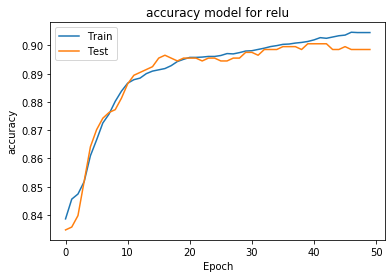

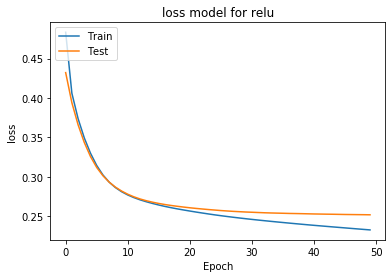

Combination 1 :  [30, 30, 30, 1]
Combination 2 :  [40, 40, 40, 1]
Combination 3 :  [50, 50, 50, 1]


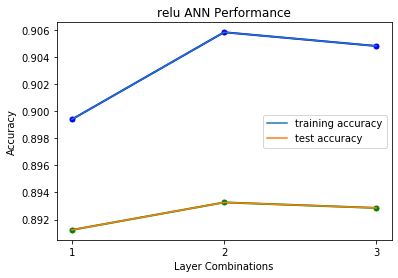

In [36]:
#Relu Activation with 3 layer combination
comb = [[30,30,30,1],[40,40,40,1],[50,50,50,1]]
model_act2('relu', comb)

Fitting for ANN model with 4 layers and selu activation
Fitting for ANN model with 4 layers and tanh activation
Fitting for ANN model with 4 layers and relu activation


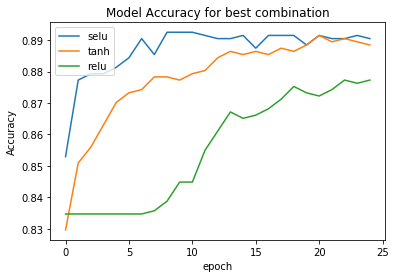

In [63]:
for activation in ['selu', 'tanh', 'relu']:
    train, val_train, test, val_test = train_test_split(x_train2, y_train2, test_size = 0.1, random_state = 0)

    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(40, input_dim=train.shape[1], activation=activation))
    model.add(Dense(40, activation=activation))
    model.add(Dense(40, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
   
    # optimizer Gradient Descent
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print("Fitting for ANN model with 4 layers and {} activation".format(activation))
    history = model.fit(train, test, epochs=25, batch_size=128, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor],verbose = 0, shuffle=False)
    plt.plot(history.history['val_accuracy'])
    
plt.title('Model Accuracy for best combination')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['selu', 'tanh', 'relu'], loc='upper left')

Model Summary is 

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 40)                1160      
_________________________________________________________________
batch_normalization_10 (Batc (None, 40)                160       
_________________________________________________________________
dense_50 (Dense)             (None, 40)                1640      
_________________________________________________________________
batch_normalization_11 (Batc (None, 40)                160       
_________________________________________________________________
dense_51 (Dense)             (None, 40)                1640      
_________________________________________________________________
batch_normalization_12 (Batc (None, 40)                160       
_________________________________________________________________
dense_52 (Dense)             (None

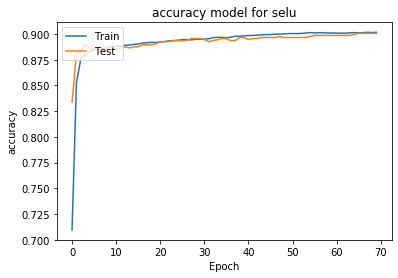

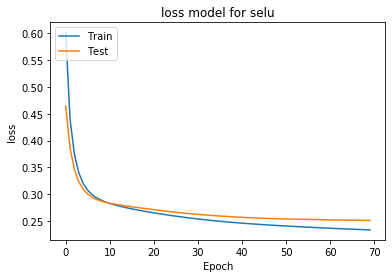

In [55]:
# Batch Normalization
cm,tr_ac,te_ac,history = ann_batch_normalization2('selu',[40,40,40,1])

Model Summary is 

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 40)                1160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_8 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 40)                1640      
_________________________________________________________________
dropout_9 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_56 (Dense)             (None

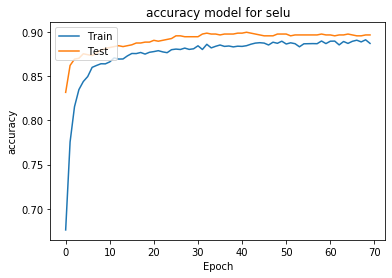

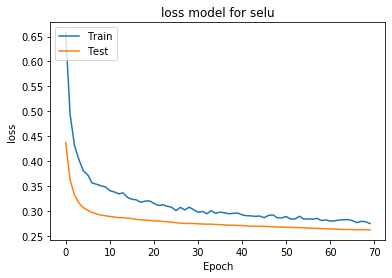

In [56]:
# Dropout Regularization
cm,tr_ac,te_ac,history = ann_dropout2('selu',[40,40,40,1])

Model Summary is 

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 40)                1160      
_________________________________________________________________
dense_102 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_103 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 41        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model using Adam Optimizer with 4 layers and selu activation
Train on 8866 samples, validate on 986 samples
Epoch 1/70
8866/8866 [==============================] - 0s 26us/step - loss: 0.3978 - accuracy: 0.833

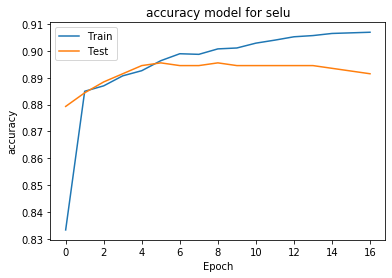

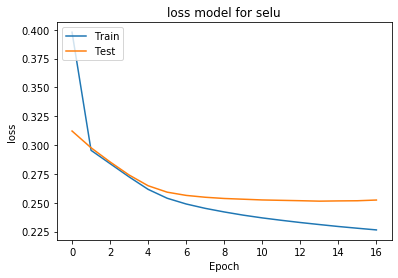

In [64]:
# adam_optimizer
cm,tr_ac,te_ac,history = ann_adam_optimizer2('selu',[40,40,40,1])

# KNN

Max of validation score 0.8750495773313702
Corresponding optimal number of neighbors is 7


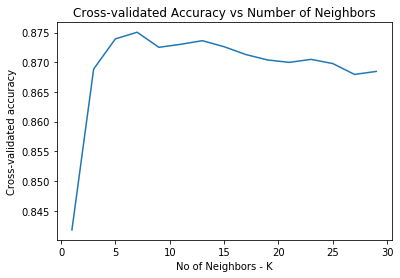

In [22]:
# optimal value of K for KNN
neighbors = list(range(1, 30, 2)) # range of k for neighbour experimentation

k_scores = list() # empty list to store scores
# we will loop through reasonable values of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k) #KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x_train2, y_train2, cv=10, scoring='accuracy') # obtain cross_val_score
    k_scores.append(scores.mean())

#print(k_scores)

print('Max of validation score', max(k_scores))
print("Corresponding optimal number of neighbors is {}".format(neighbors[k_scores.index(max(k_scores))]))

plt.plot(neighbors, k_scores)
plt.xlabel('No of Neighbors - K')
plt.ylabel('Cross-validated accuracy')
plt.title("Cross-validated Accuracy vs Number of Neighbors")
plt.show()

The optimal number of neighbors is 7


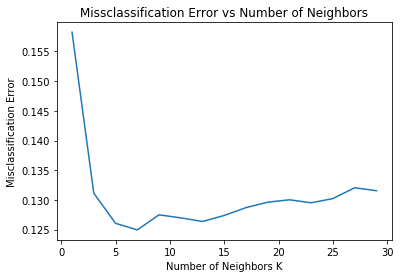

In [23]:
#changing misclassification error
mse = [1 - x for x in k_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.title("Missclassification Error vs Number of Neighbors")
plt.show()

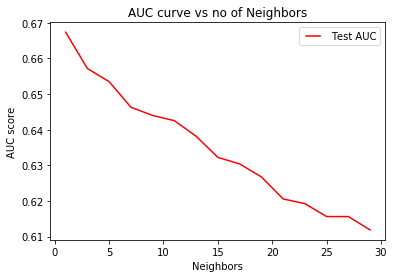

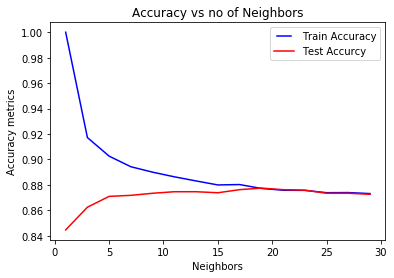

In [21]:
neighbors = list(range(1,30,2))
train_results = list()
test_results = list()
train_accuracy = list()
test_accuracy = list()
for n in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(x_train2, y_train2)  
    train_pred = knn_model.predict(x_train2)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = knn_model.predict(x_test2)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    train_acc = knn_model.score(x_train2,y_train2)
    #print("Accuracy Metrics using {} neighbors for KNN classification".format(n))
    #print("Train set accuracy: {:.4f} \n \n".format(train_acc))
    #print('Test accuracy:', accuracy_score(y_pred,y_test2))
    #print(classification_report(y_test2, y_pred))
    train_accuracy.append(train_acc)
    test_accuracy.append(accuracy_score(y_pred,y_test2))
    
#line1, = plt.plot(neighbors, train_results,'b', label="Train AUC")
line2, = plt.plot(neighbors, test_results, 'r',label="Test AUC")
plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Neighbors')
plt.title('AUC curve vs no of Neighbors')
plt.show()

line3, = plt.plot(neighbors, train_accuracy,'b', label="Train Accuracy")
line4, = plt.plot(neighbors, test_accuracy, 'r',label="Test Accurcy")
plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy metrics')
plt.xlabel('Neighbors')
plt.title('Accuracy vs no of Neighbors')
plt.show()

Accuracy Metrics using minkowski distance for KNN classification
Train set accuracy: 0.8942 
 

Test accuracy: 0.8717532467532467
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2088
           1       0.66      0.32      0.43       376

    accuracy                           0.87      2464
   macro avg       0.78      0.65      0.68      2464
weighted avg       0.85      0.87      0.85      2464

Accuracy Metrics using euclidean distance for KNN classification
Train set accuracy: 0.8942 
 

Test accuracy: 0.8717532467532467
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2088
           1       0.66      0.32      0.43       376

    accuracy                           0.87      2464
   macro avg       0.78      0.65      0.68      2464
weighted avg       0.85      0.87      0.85      2464

Accuracy Metrics using manhattan distance for KNN classification
Train set accuracy: 0

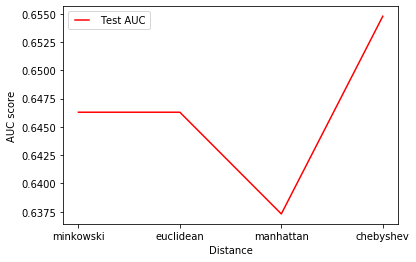

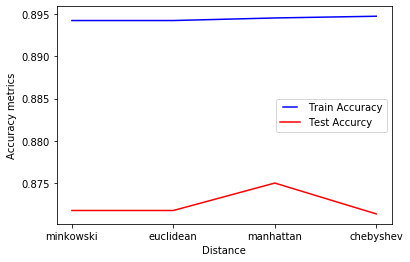

In [47]:
distances = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
train_results = list()
test_results = list()
train_accuracy = list()
test_accuracy = list()
for p in distances:
    knn_model = KNeighborsClassifier(n_neighbors = 7, metric=p)
    knn_model.fit(x_train2, y_train2)  
    train_pred = knn_model.predict(x_train2)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train2, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = knn_model.predict(x_test2)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test2, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    train_acc = knn_model.score(x_train2,y_train2)
    print("Accuracy Metrics using {} distance for KNN classification".format(p))
    print("Train set accuracy: {:.4f} \n \n".format(train_acc))
    print('Test accuracy:', accuracy_score(y_pred,y_test2))
    print(classification_report(y_test2, y_pred))
    train_accuracy.append(train_acc)
    test_accuracy.append(accuracy_score(y_pred,y_test2))
    


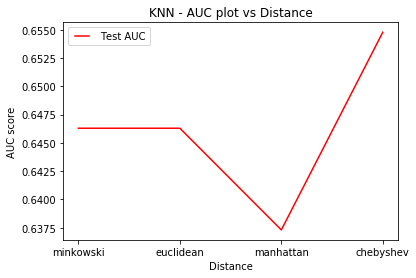

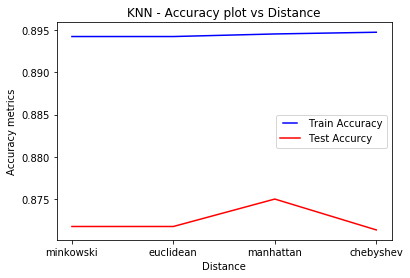

In [49]:
#line1, = plt.plot(distances, train_results,'b', label="Train AUC")
line2, = plt.plot(distances, test_results, 'r',label="Test AUC")
plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.title('KNN - AUC plot vs Distance')
plt.ylabel('AUC score')
plt.xlabel('Distance')
plt.show()

line3, = plt.plot(distances, train_accuracy,'b', label="Train Accuracy")
line4, = plt.plot(distances, test_accuracy, 'r',label="Test Accurcy")
plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})
plt.title('KNN - Accuracy plot vs Distance')
plt.ylabel('Accuracy metrics')
plt.xlabel('Distance')
plt.show()

In [54]:
k_range = list(range(1, 30, 2))
knn = KNeighborsClassifier()
# Another parameter besides k that we might vary is the weights parameters
# another option --> distance (weights closer neighbors more heavily than further neighbors)
weight_options = ['uniform','distance']
distances = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']

param_grid = dict(n_neighbors=k_range, metric = distances, weights=weight_options, n_jobs = [4])

grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid.fit(x_train2, y_train2)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_jobs': [4],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27, 29],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [55]:
# Best model
print(grid.best_score_)
print(grid.best_params_)

0.8752537555826229
{'metric': 'chebyshev', 'n_jobs': 4, 'n_neighbors': 15, 'weights': 'distance'}


In [56]:
# instantiate model with best parameters
knn_best = KNeighborsClassifier(n_neighbors=15, weights='distance', metric = 'chebyshev')

In [59]:
# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn_best.fit(x_train2, y_train2)
train_acc_best = knn_best.score(x_train2,y_train2)
print("Train set accuracy: {:.3f}".format(train_acc_best))
y_pred_ = knn_best.predict(x_test2)

print('Test accuracy:', accuracy_score(y_pred_,y_test2))
print(classification_report(y_test2, y_pred_))
print("Confusion Matrix :\n", confusion_matrix(y_test2,y_pred_))
print("AUC",roc_auc_score(y_test2, y_pred_))

Train set accuracy: 1.000
Test accuracy: 0.8737824675324676
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2088
           1       0.71      0.29      0.41       376

    accuracy                           0.87      2464
   macro avg       0.80      0.63      0.67      2464
weighted avg       0.86      0.87      0.85      2464

Confusion Matrix :
 [[2044   44]
 [ 267  109]]
AUC 0.6344104100432053


roc_auc_score for KNN:  0.6344104100432053


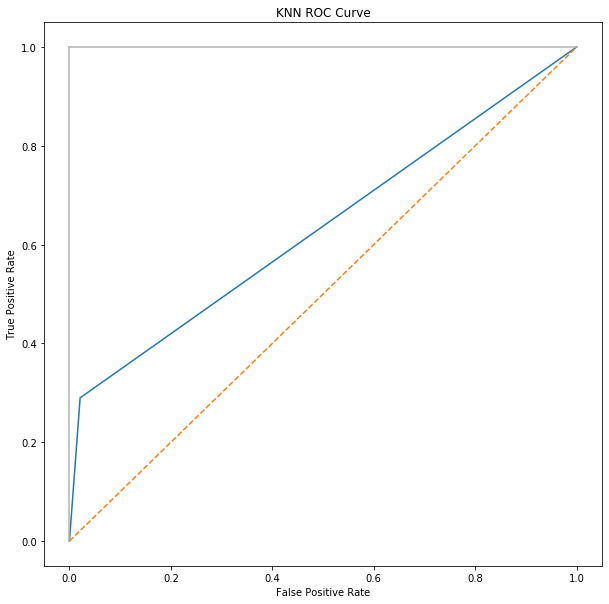

In [60]:
fpr_best, tpr_best, threshold_best = roc_curve(y_test2, y_pred_)
print('roc_auc_score for KNN: ', roc_auc_score(y_test2, y_pred_))

plt.subplots(1, figsize=(10,10))
plt.title('KNN ROC Curve')
plt.plot(fpr_best, tpr_best)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()